In [153]:
import pandas as pd
import numpy as np
import math,copy,os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from pathlib import Path
from Measure import measure_final_score
import statistics
from CatEncoder import *
import glob
import pickle

In [154]:
def get_results(mut_op, selection, path_name):
    path = r'/Users/germainherbay/PycharmProjects/Blind/adult/score/blind/'+mut_op+'/'+selection+'/'+path_name+'/' # use your path
    all_files = glob.glob(path + "/*.csv")
    first_df = pd.read_csv(all_files[0])
    first_df['name'] = Path(all_files[0]).name
    first_df['Column mutated'] = path_name
    first_df['mutation'] = mut_op+"_"+selection
    for filename in all_files[1:]:
        df = pd.read_csv(filename)
        df['name'] = Path(filename).name
        df['Column mutated'] = path_name
        df['mutation'] = mut_op+"_"+selection
        first_df = first_df.append(df)
    first_df['model'] = first_df['model'].replace(['LogisticRegression()','RandomForestClassifier()', 'SVC()', 'MLPClassifier()'],['LR','RF','SVC', 'MLPC'])
    first_df.rename(columns = {'protected_att':'PA'}, inplace = True)
    return first_df

operators = ['age', 'capital-gain', 'capital-loss', 'education-num',
             'hours-per-week', 'marital-status', 'native-country', 'occupation',
             'race', 'relationship', 'sex', 'workclass']

def get_all_results(mut_op, operators, selection):
    df_1 = get_results(mut_op, selection, operators[0])
    for operator in operators[1:]:
        df = get_results(mut_op, selection, operator)
        df_1 = df_1.append(df)
    return df_1

df_cl_0_5 = get_all_results("change_label", operators, "0_5")
df_cl_1 = get_all_results("change_label", operators, "1")
df_cl_1_5 = get_all_results("change_label", operators, "1_5")
df_cl_2 = get_all_results("change_label", operators, "2")

df_sh_0_5 = get_all_results("shuffle", operators, "0_5")
df_sh_1 = get_all_results("shuffle", operators, "1")
df_sh_1_5 = get_all_results("shuffle", operators, "1_5")
df_sh_2 = get_all_results("shuffle", operators, "2")

df = df_cl_1.append(df_cl_0_5)
df = df_cl_1_5.append(df)
df = df_cl_2.append(df)
df = df_sh_0_5.append(df)
df = df_sh_1.append(df)
df = df_sh_1_5.append(df)
df = df_sh_2.append(df)



1. Analysing sex for SPD

<Figure size 360x576 with 0 Axes>

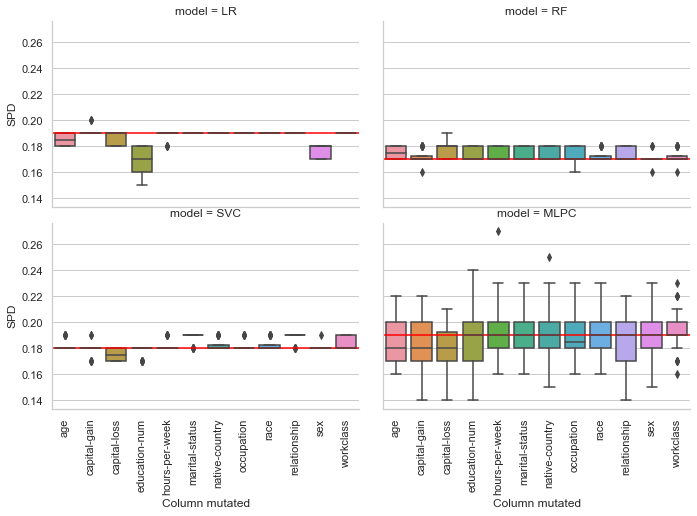

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize = (5,8))
df_sex = df[(df["PA"] == 'sex')]
g = sns.catplot(
    data=df_sex, x='Column mutated', y='SPD',
    col='model', kind='box', col_wrap=2,
)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

# flatten axes into a 1-d array
axes = g.axes.flatten()
la = {0: [0.19], 1: [0.17],
      2: [0.18], 3: [0.19]}

# iterate through the axes
for i, ax in enumerate(axes):
    ax.axhline(la[i][0], color='red', ls='-')

<Figure size 360x576 with 0 Axes>

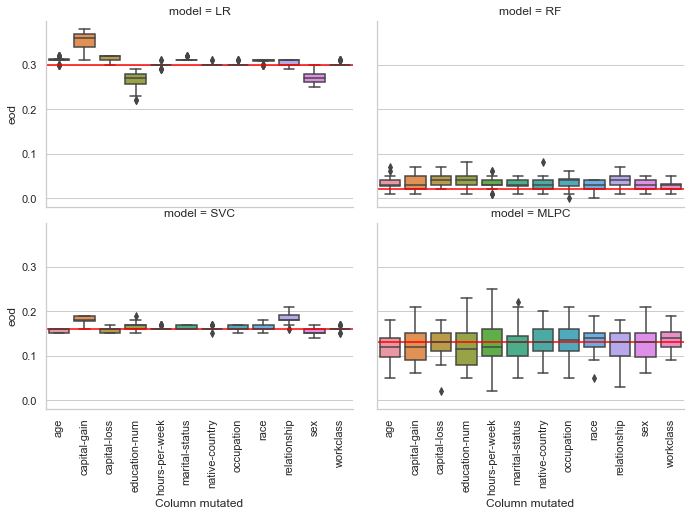

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize = (5,8))
df_sex = df[(df["PA"] == 'sex')]
g = sns.catplot(
    data=df_sex, x='Column mutated', y='eod',
    col='model', kind='box', col_wrap=2,
)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

# flatten axes into a 1-d array
axes = g.axes.flatten()
la = {0: [0.3], 1: [0.02],
      2: [0.16], 3: [0.13]}

# iterate through the axes
for i, ax in enumerate(axes):
    ax.axhline(la[i][0], color='red', ls='-')



In [157]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x="model", y="eod", hue="PA", data=first_df, palette="Set3")

df_lr = df[(df["model"] == "LR") & (df["PA"] == 'sex')]
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="SPD", data=df_lr, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))
ax.axhline(0.19, color='red', ls='-')


ValueError: Could not interpret input 'operator'

In [ ]:
df_rf = df[(df["model"] == "RF") & (df["PA"] == 'sex')]
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="SPD", data=df_rf, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))
ax.axhline(0.17, color='red', ls='-')


In [ ]:
df_svc = df[(df["model"] == "SVC") & (df["PA"] == 'sex')]
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="SPD", data=df_svc, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))
ax.axhline(0.18, color='red', ls='-')

In [ ]:
df_mlpc = df[(df["model"] == "MLPC") & (df["PA"] == 'sex')]
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="SPD", data=df_mlpc, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))
ax.axhline(0.19, color='red', ls='-')


2. Analysing sex for EOD

In [ ]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x="model", y="eod", hue="PA", data=first_df, palette="Set3")

df_lr = df[(df["model"] == "LR") & (df["PA"] == 'sex')]
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="eod", data=df_lr, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))
ax.axhline(0.3, color='red', ls='-')


In [ ]:
df_rf = df[(df["model"] == "RF") & (df["PA"] == 'sex')]
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="eod", data=df_rf, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))
ax.axhline(0.02, color='red', ls='-')


In [ ]:
df_svc = df[(df["model"] == "SVC") & (df["PA"] == 'sex')]
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="eod", data=df_svc, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))
ax.axhline(0.16, color='red', ls='-')

In [ ]:
df_mlpc = df[(df["model"] == "MLPC") & (df["PA"] == 'sex')]
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="eod", data=df_mlpc, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))
ax.axhline(0.13, color='red', ls='-')
